In [635]:
!pip install git+https://github.com/TimeSynth/TimeSynth.git

  Cloning https://github.com/TimeSynth/TimeSynth.git to /tmp/pip-req-build-2iau_thm
  Running setup.py bdist_wheel for timesynth ... done
  Stored in directory: /tmp/pip-ephem-wheel-cache-aw87pavn/wheels/00/d5/b7/7f6f768fc3457c8292ae5a0856c51089efa4409ec2811fbcdd
Successfully built timesynth
fastai 1.0.52 requires nvidia-ml-py3, which is not installed.
thinc 6.12.1 has requirement msgpack<0.6.0,>=0.5.6, but you'll have msgpack 0.6.0 which is incompatible.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [636]:
import numpy as np
import pandas as pd
import timesynth as ts
import matplotlib.pylab as plt

samplesPerSensorInput = 100

In [637]:
# Sphere data

!wget https://environmental-hack.s3-us-west-2.amazonaws.com/data.zip
!unzip data.zip
!cd data && ls


--2019-07-13 14:09:38--  https://environmental-hack.s3-us-west-2.amazonaws.com/data.zip
Resolving environmental-hack.s3-us-west-2.amazonaws.com (environmental-hack.s3-us-west-2.amazonaws.com)... 52.218.208.89
Connecting to environmental-hack.s3-us-west-2.amazonaws.com (environmental-hack.s3-us-west-2.amazonaws.com)|52.218.208.89|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14390297 (14M) [application/zip]
Saving to: ‘data.zip.13’

data.zip.13         100%[===================>]  13.72M  --.-KB/s    in 0.08s   

2019-07-13 14:09:39 (169 MB/s) - ‘data.zip.13’ saved [14390297/14390297]

Archive:  data.zip
replace data/2018-01-01__2019-01-01__NConservatory_npWeekdayAllOrderedSensorsTimeRef_sampleBounds.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C
2018-01-01__2019-01-01__NConservatory__allMerged.csv
2018-01-01__2019-01-01__NConservatory_npWeekdayAllOrderedSensorsTimeRef.npy
2018-01-01__2019-01-01__NConservatory_npWeekdayAllOrderedSensorsTimeRef_sampleBounds.npy


In [755]:
# reading north conservatory into pd datafram
df = pd.read_csv( index_col = 0,  parse_dates = True, infer_datetime_format = True, 
                         filepath_or_buffer = './data/2018-01-01__2019-01-01__NConservatory__allMerged.csv')

# extraxting values into arrays
co2_1 = df[['co2_1','co2_2']]
co2_2 = df[['co2_3','co2_4']]
dew_1 = df[['dew_1','dew_2']]
dew_2 = df[['dew_3','dew_4']]
relH_1 = df[['relH_1','relH_2']]
relH_2 = df[['relH_3','relH_4']]
temp_1 = df[['temp_1','temp_2']]
temp_2 = df[['temp_3','temp_4']]

# removing indecies of date
co2_1 = co2_1.values
co2_2 = co2_2.values
dew_1 = dew_1.values
dew_2 = dew_2.values
relH_1 = relH_1.values
relH_2 = relH_2.values
temp_1 = temp_1.values
temp_2 = temp_2.values

In [759]:
# reading south conservatory into pd datafram
df2 = pd.read_csv( index_col = 0,  parse_dates = True, infer_datetime_format = True, 
                         filepath_or_buffer = './data/2018-01-01__2019-01-01__SConservatory__allMerged.csv')

# extraxting values into arrays
_co2_1 = df2[['co2_1','co2_2']]
_co2_2 = df2[['co2_3','co2_4']]
_dew_1 = df2[['dew_1','dew_2']]
_dew_2 = df2[['dew_3','dew_4']]
_relH_1 = df2[['relH_1','relH_2']]
_relH_2 = df2[['relH_3','relH_4']]
_temp_1 = df2[['temp_1','temp_2']]
_temp_2 = df2[['temp_3','temp_4']]

# removing indecies of date
_co2_1 = _co2_1.values 
_co2_2 = _co2_2.values 
_dew_1 = _dew_1.values
_dew_2 = _dew_2.values
_relH_1 = _relH_1.values
_relH_2 = _relH_2.values
_temp_1 = _temp_1.values
_temp_2 = _temp_2.values

In [760]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [761]:
# split and rescale model taken from AWS SageMaker package
def split_and_rescale ( X ):
    X_train, X_test = train_test_split( X, test_size = .25, shuffle = False )
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform( X_train )
    X_test_scaled = scaler.transform( X_test )
    return X_train_scaled, X_test_scaled

In [762]:
# previously defined arrays scaled (North)
co2_1_train_scaled, co2_1_test_scaled = split_and_rescale(co2_1)
co2_2_train_scaled, co2_2_test_scaled = split_and_rescale(co2_2)
dew_1_train_scaled, dew_1_test_scaled = split_and_rescale(dew_1)
dew_2_train_scaled, dew_2_test_scaled = split_and_rescale(dew_2)
relH_1_train_scaled, relH_1_test_scaled = split_and_rescale(relH_1)
relH_2_train_scaled, relH_2_test_scaled = split_and_rescale(relH_2)
temp_1_train_scaled, temp_1_test_scaled = split_and_rescale(temp_1)
temp_2_train_scaled, temp_2_test_scaled = split_and_rescale(temp_2)

# previously defined arrays scaled (South)
_co2_1_train_scaled, _co2_1_test_scaled = split_and_rescale(_co2_1)
_co2_2_train_scaled, _co2_2_test_scaled = split_and_rescale(_co2_2)
_dew_1_train_scaled, _dew_1_test_scaled = split_and_rescale(_dew_1)
_dew_2_train_scaled, _dew_2_test_scaled = split_and_rescale(_dew_2)
_relH_1_train_scaled, _relH_1_test_scaled = split_and_rescale(_relH_1)
_relH_2_train_scaled, _relH_2_test_scaled = split_and_rescale(_relH_2)
_temp_1_train_scaled, _temp_1_test_scaled = split_and_rescale(_temp_1)
_temp_2_train_scaled, _temp_2_test_scaled = split_and_rescale(_temp_2)

In [763]:
# reshape function from AWS SageMaker package
def reshape_into_sliding_windows ( X, windowSize, advanceSamples = 1 ):
    # determine number of sliding windows that fit within dataset
    nWindows = int( np.floor( (X.shape[0] - windowSize)/(advanceSamples*1.0) ) )
    
    # pre-allocate matrix which holds sliding windows
    outputMatrix = np.zeros((nWindows, windowSize))
    
    # populate each sliding window
    for iWindow in range(nWindows):
        startIndex = iWindow * advanceSamples
        endIndex = startIndex + windowSize
        
        outputMatrix[iWindow, :] = X[ startIndex:endIndex, 0]
    
    return outputMatrix

In [764]:
# previously defined arrays shaped (North)
co2_1_train_scaled_windowed = reshape_into_sliding_windows( co2_1_train_scaled, samplesPerSensorInput)
co2_2_train_scaled_windowed = reshape_into_sliding_windows( co2_2_train_scaled, samplesPerSensorInput)
dew_1_train_scaled_windowed = reshape_into_sliding_windows( dew_1_train_scaled, samplesPerSensorInput)
dew_2_train_scaled_windowed = reshape_into_sliding_windows( dew_2_train_scaled, samplesPerSensorInput)
relH_1_train_scaled_windowed = reshape_into_sliding_windows( relH_1_train_scaled, samplesPerSensorInput)
relH_2_train_scaled_windowed = reshape_into_sliding_windows( relH_2_train_scaled, samplesPerSensorInput)
temp_1_train_scaled_windowed = reshape_into_sliding_windows( temp_1_train_scaled, samplesPerSensorInput)
temp_2_train_scaled_windowed = reshape_into_sliding_windows( temp_2_train_scaled, samplesPerSensorInput)

# previously defined arrays shaped (South)
_co2_1_train_scaled_windowed = reshape_into_sliding_windows( _co2_1_train_scaled, samplesPerSensorInput)
_co2_2_train_scaled_windowed = reshape_into_sliding_windows( _co2_2_train_scaled, samplesPerSensorInput)
_dew_1_train_scaled_windowed = reshape_into_sliding_windows( _dew_1_train_scaled, samplesPerSensorInput)
_dew_2_train_scaled_windowed = reshape_into_sliding_windows( _dew_2_train_scaled, samplesPerSensorInput)
_relH_1_train_scaled_windowed = reshape_into_sliding_windows( _relH_1_train_scaled, samplesPerSensorInput)
_relH_2_train_scaled_windowed = reshape_into_sliding_windows( _relH_2_train_scaled, samplesPerSensorInput)
_temp_1_train_scaled_windowed = reshape_into_sliding_windows( _temp_1_train_scaled, samplesPerSensorInput)
_temp_2_train_scaled_windowed = reshape_into_sliding_windows( _temp_2_train_scaled, samplesPerSensorInput)

In [765]:
# Loading data with np.hstack as trainingData
trainingData = np.hstack( (co2_1_train_scaled_windowed,co2_2_train_scaled_windowed,dew_1_train_scaled_windowed,dew_2_train_scaled_windowed,
                          relH_1_train_scaled_windowed,relH_2_train_scaled_windowed,temp_1_train_scaled_windowed,temp_2_train_scaled_windowed) )

_trainingData = np.hstack( (_co2_1_train_scaled_windowed,_co2_2_train_scaled_windowed,_dew_1_train_scaled_windowed,_dew_2_train_scaled_windowed,
                          _relH_1_train_scaled_windowed,_relH_2_train_scaled_windowed,_temp_1_train_scaled_windowed,_temp_2_train_scaled_windowed) )

In [766]:
trainingData.shape

(26100, 800)

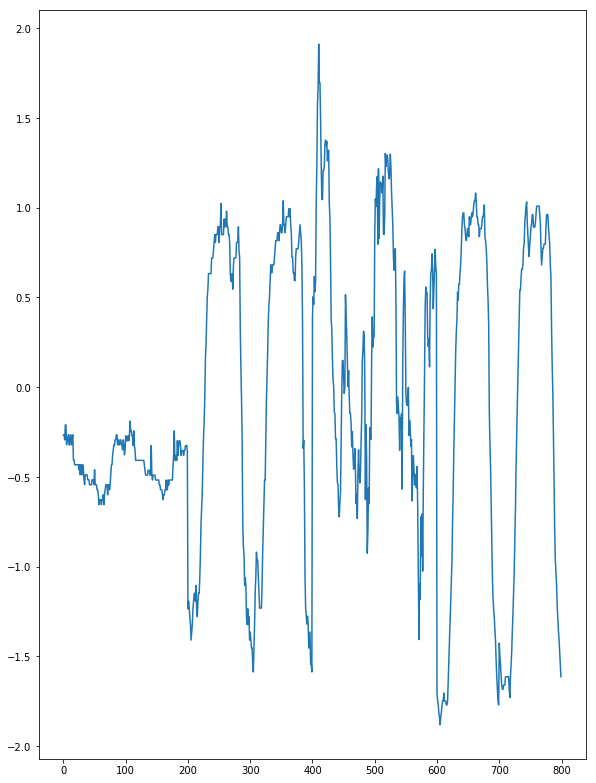

In [767]:
plt.plot(trainingData[0,:], '-')

In [768]:
import torch, torch.nn as nn, time
from torch.utils.data import Dataset, DataLoader

In [769]:
# AWS SageMaker model of loading data with pytorch
dataLoaderTrain = DataLoader( trainingData.astype('float32'), 
                                 batch_size = 16, 
                                 shuffle = True )

dataLoaderTest = DataLoader( trainingData.astype('float32'), 
                                 batch_size = 1, 
                                 shuffle = False )

dataLoaderTest2 = DataLoader( _trainingData.astype('float32'), 
                                 batch_size = 1, 
                                 shuffle = False )


In [770]:
##################################################################################

# - - - - - - - - - - - - - - MANIFEST MODEL NETWORK - - - - - - - - - - - - - - #

##################################################################################

In [771]:
inputDimensionality = trainingData.shape[1]

model = nn.Sequential (
    nn.Linear(inputDimensionality, inputDimensionality//2), nn.Sigmoid(),
    nn.Linear(inputDimensionality//2, inputDimensionality//4), nn.Sigmoid(),
    nn.Linear(inputDimensionality//4, inputDimensionality//10), nn.Sigmoid(),
    nn.Linear(inputDimensionality//10, inputDimensionality//4), nn.Sigmoid(),
    nn.Linear(inputDimensionality//4, inputDimensionality//2), nn.Sigmoid(),
    nn.Linear(inputDimensionality//2, inputDimensionality)
)

In [772]:
from nnViz_pytorch import *

In [773]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [9.5, 13]
plt.rcParams['figure.subplot.left'] = plt.rcParams['figure.subplot.bottom'] = .1
plt.rcParams['figure.subplot.right'] = plt.rcParams['figure.subplot.top'] = .9

83
832000


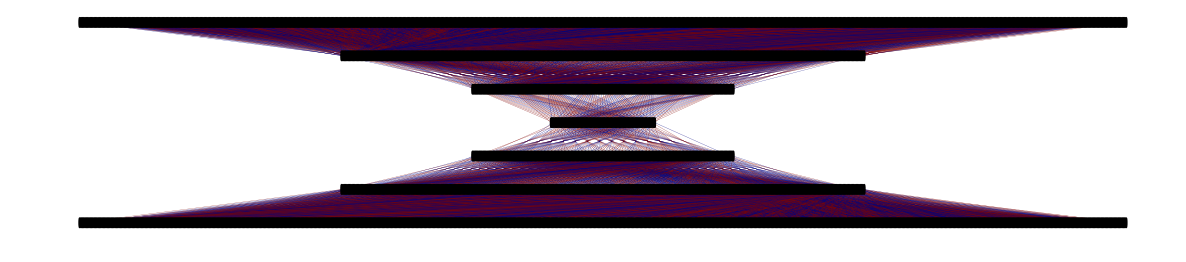

elapsed time: 9.63058614730835


In [774]:
startTime = time.time()

plt.figure(figsize=(20,4)); ax = plt.gca()

visualize_model(model, ax)

plt.axis('tight'); plt.axis('off'); plt.show()

print('elapsed time: {}'.format(time.time()-startTime))

In [775]:
targetDeviceCPU = torch.device('cpu')
targetDeviceGPU = torch.device('cuda:0')
targetDevice = targetDeviceGPU

In [656]:
#################################################################################

# - - - - - - - - - - - - - - - - TRAIN NETWORK - - - - - - - - - - - - - - - - #

#################################################################################

In [776]:
# AWS SageMaker training model
def train_model ( model, dataLoader, targeDevice, nEpochs = 10 ):

    model = model.to( targetDevice )
    
    lossFunction = nn.MSELoss()
    optimizer = torch.optim.Adam( model.parameters() )
    lossHistory = []
    
    # training loop    
    for iEpoch in range(nEpochs):   
        cumulativeLoss = 0
        for i, iInputBatch in enumerate( dataLoader ):
            
            # move batch data to target training device [ cpu or gpu ]
            iInputBatch = iInputBatch.to( targetDevice )
            
            # zero/reset the parameter gradient buffers to avoid accumulation [ usually accumulation is necessary for temporally unrolled networks ]
            optimizer.zero_grad()
            
            # generate predictions/reconstructions
            predictions = model.forward(iInputBatch)

            # compute error 
            loss = lossFunction( predictions, iInputBatch )
            cumulativeLoss += loss.item() # gets scaler value held in the loss tensor
            
            # compute gradients by propagating the error backward through the model/graph
            loss.backward()

            # apply gradients to update model parameters
            optimizer.step()
            
        print( 'epoch {} of {} -- avg batch loss: {}'.format(iEpoch, nEpochs, cumulativeLoss))
        
        lossHistory += [ cumulativeLoss ]
    return model, lossHistory

### Run Training Loop

In [784]:
startTime = time.time()

model, lossHistory = train_model( model, dataLoaderTrain, targetDevice, nEpochs = 50 )

print('elapsed time : {} '.format(time.time() - startTime))

epoch 0 of 50 -- avg batch loss: 89.09074623510242
epoch 1 of 50 -- avg batch loss: 87.36131848394871
epoch 2 of 50 -- avg batch loss: 85.96720515936613
epoch 3 of 50 -- avg batch loss: 84.5656166151166
epoch 4 of 50 -- avg batch loss: 83.19537649676204
epoch 5 of 50 -- avg batch loss: 82.02006437629461
epoch 6 of 50 -- avg batch loss: 80.66514068469405
epoch 7 of 50 -- avg batch loss: 79.79402586072683
epoch 8 of 50 -- avg batch loss: 78.5622194930911
epoch 9 of 50 -- avg batch loss: 77.69866531342268
epoch 10 of 50 -- avg batch loss: 76.67020538821816
epoch 11 of 50 -- avg batch loss: 75.89215517789125
epoch 12 of 50 -- avg batch loss: 74.98206340149045
epoch 13 of 50 -- avg batch loss: 74.1261574961245
epoch 14 of 50 -- avg batch loss: 73.45804809778929
epoch 15 of 50 -- avg batch loss: 72.71994996070862
epoch 16 of 50 -- avg batch loss: 71.92453115060925
epoch 17 of 50 -- avg batch loss: 71.34063574299216
epoch 18 of 50 -- avg batch loss: 70.74165933206677
epoch 19 of 50 -- avg bat

In [778]:
#################################################################################

# - - - - - - - - - - - - - - - MODEL EVALUATION - - - - - - - - - - - - - - - #

#################################################################################

# Evaluate Model Performance

Simple demo using a single sample 

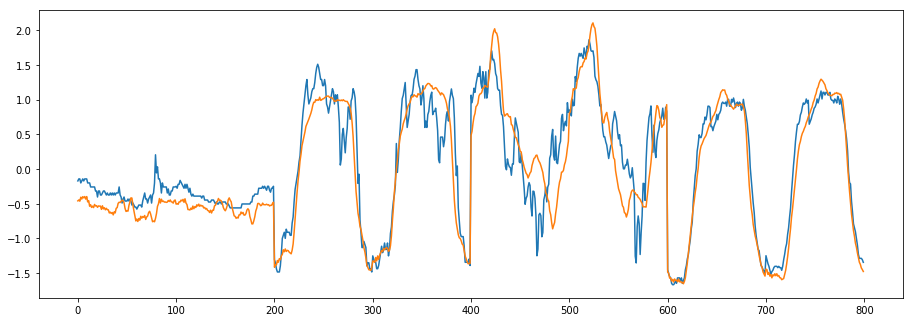

In [780]:
# plot to contrast differences in input data vs output data from the trained neural network

sample = iter(dataLoaderTest2).next()[0]
reconstruction = model.forward(sample.to(targetDevice))

fig=plt.figure(figsize=(15, 5))

plt.plot(sample.numpy()) #blue
plt.plot(reconstruction.data.cpu().numpy()) #orange
plt.show()

In [781]:
# we define an anomaly as having a stdev of > 0.5
def test_for_anomaly(x1,x2):
    
    x = [((x1[i] - x2[i])**2)**1/2 for i in range(len(x1))]
    
    anomaly = False
    count = 0
    anomalyList = [];
    
    for i in range(len(x)):
        if x[i] >= 0.5:
            anomaly = True
            print("\nAnomaly position: \t",i)
            print("Stndrd Deviation: \t",format(round(x[i],2)))
            anomalyList.append(i)
            count+=1
            
    if anomaly == False:
        print(anomaly)

    else:
        print("\nCount: ",count)
        
    return anomalyList

In [782]:
anomalyList = test_for_anomaly(sample.numpy(),reconstruction.data.cpu().numpy())


Anomaly position: 	 282
Stndrd Deviation: 	 0.6

Anomaly position: 	 283
Stndrd Deviation: 	 0.59

Anomaly position: 	 368
Stndrd Deviation: 	 0.51

Anomaly position: 	 382
Stndrd Deviation: 	 0.7

Anomaly position: 	 383
Stndrd Deviation: 	 0.7

Anomaly position: 	 467
Stndrd Deviation: 	 1.05

Anomaly position: 	 468
Stndrd Deviation: 	 0.85

Anomaly position: 	 482
Stndrd Deviation: 	 0.78

Anomaly position: 	 483
Stndrd Deviation: 	 1.02

Anomaly position: 	 486
Stndrd Deviation: 	 0.63

Count:  10


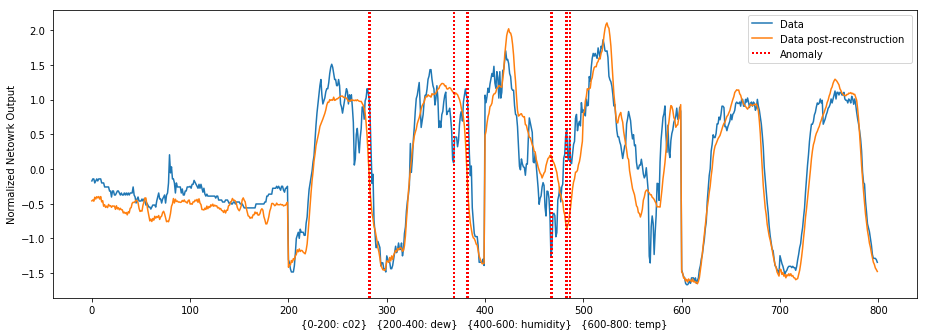

In [783]:
# graph to indecate anomaly potitions

fig=plt.figure(figsize=(15, 5))

plt.plot(sample.numpy())
plt.plot(reconstruction.data.cpu().numpy())
[plt.axvline(x,c = 'r',dashes=[1,1],linewidth=2) for x in anomalyList]

plt.legend(('Data','Data post-reconstruction ','Anomaly'))
plt.xlabel('{0-200: c02}   {200-400: dew}   {400-600: humidity}   {600-800: temp}')
plt.ylabel('Normalized Netowrk Output')

plt.show()